# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Sahra Bilqis Fauziyyah
- Email: sabifa0251@gmail.com
- Id Dicoding: Sahra Bilqis Fauziyyah

## Menentukan Pertanyaan Bisnis

Pertanyaan

- Apakah terdapat pola harian dalam jumlah penyewa sepeda? (Misalnya, apakah ada peningkatan pada jam-jam tertentu?)

- Bagaimana pengaruh kondisi cuaca terhadap penggunaan sepeda?

- Bagaimana pola penggunaan sepeda berubah sepanjang musim? Apakah ada perbedaan signifikan dalam jumlah penggunaan sepeda antara musim tertentu?

## Menyaipkan semua library yang dibuthkan

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [59]:
#membaca data hour.csv
df_hour = pd.read_csv('hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [60]:
#membaca data day.csv
df_day = pd.read_csv('day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [61]:
#memeriksa tipe data data dari tiap kolom yang terdapat dalam df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [62]:
#memeriksa tipe data data dari tiap kolom yang terdapat dalam df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [63]:
#Untuk mengetahui adakah missing value pada tabel
df_hour.isna().sum()

#tidak ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [64]:
#Untuk mengetahui adakah data duplikat pada tabel
print("Jumlah duplikasi: ", df_day.duplicated().sum())

#tidak ada data duplikat

Jumlah duplikasi:  0


In [65]:
#memeriksa parameter statistik dari kolom numerik yang terdapat dalam df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [66]:
#memeriksa parameter statistik dari kolom numerik yang terdapat dalam df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [67]:
#mengubah tipe data pada kolom 'dteday' menjadi datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'], format='%Y-%m-%d')

In [68]:
#memeriksa tipe data data dari tiap kolom yang terdapat dalam df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [69]:
#mengubah tipe data pada kolom 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'], format='%Y-%m-%d')

In [70]:
#memeriksa tipe data data dari tiap kolom yang terdapat dalam df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [71]:
#melihat rangkuman parameter statistik dari data df_hour
df_hour.describe(include="all")

<ipython-input-71-9a277fb58343>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [72]:
# Filter data untuk tahun 2011-2012
data_2011 = df_hour[df_hour['dteday'].dt.year == 2011]
data_2012 = df_hour[df_hour['dteday'].dt.year == 2012]

In [73]:
# Menghitung jumlah penyewa berdasarkan Tahun
total_cnt_by_weathersit = df_hour.groupby('yr')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt = total_cnt_by_weathersit.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print("\nTotal jumlah penyewa berdasarkan Tahun\n")
for index, row in sorted_total_cnt.iterrows():
    print(f"Tahun {row['yr']:2d}: Jumlah Penyewa = {row['cnt']}")


Total jumlah penyewa berdasarkan Tahun

Tahun  1: Jumlah Penyewa = 2049576
Tahun  0: Jumlah Penyewa = 1243103


In [74]:
# Menghitung jumlah penyewa berdasarkan jam
total_cnt_by_hour = df_hour.groupby('hr')['cnt'].sum().reset_index()

# Menghitung jumlah penyewa berdasarkan jam
total_cnt_by_hour2011 = data_2011.groupby('hr')['cnt'].sum().reset_index()
total_cnt_by_hour2012 = data_2012.groupby('hr')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt = total_cnt_by_hour.sort_values(by='cnt', ascending=False)
sorted_total_cnt2011 = total_cnt_by_hour2011.sort_values(by='cnt', ascending=False)
sorted_total_cnt2012 = total_cnt_by_hour2012.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print("\nTotal jumlah penyewa berdasarkan Jam selama 2 tahun\n")
for index, row in sorted_total_cnt.iterrows():
    print(f"Jam {row['hr']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Jam pada tahun 2011\n")
for index, row in sorted_total_cnt2011.iterrows():
    print(f"Jam {row['hr']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\n\nTotal jumlah penyewa berdasarkan Jam pada tahun 2012\n")
for index, row in sorted_total_cnt2012.iterrows():
    print(f"Jam {row['hr']:2d}: Jumlah Penyewa = {row['cnt']}")



Total jumlah penyewa berdasarkan Jam selama 2 tahun

Jam 17: Jumlah Penyewa = 336860
Jam 18: Jumlah Penyewa = 309772
Jam  8: Jumlah Penyewa = 261001
Jam 16: Jumlah Penyewa = 227748
Jam 19: Jumlah Penyewa = 226789
Jam 13: Jumlah Penyewa = 184919
Jam 12: Jumlah Penyewa = 184414
Jam 15: Jumlah Penyewa = 183149
Jam 14: Jumlah Penyewa = 175652
Jam 20: Jumlah Penyewa = 164550
Jam  9: Jumlah Penyewa = 159438
Jam  7: Jumlah Penyewa = 154171
Jam 11: Jumlah Penyewa = 151320
Jam 10: Jumlah Penyewa = 126257
Jam 21: Jumlah Penyewa = 125445
Jam 22: Jumlah Penyewa = 95612
Jam 23: Jumlah Penyewa = 63941
Jam  6: Jumlah Penyewa = 55132
Jam  0: Jumlah Penyewa = 39130
Jam  1: Jumlah Penyewa = 24164
Jam  2: Jumlah Penyewa = 16352
Jam  5: Jumlah Penyewa = 14261
Jam  3: Jumlah Penyewa = 8174
Jam  4: Jumlah Penyewa = 4428

Total jumlah penyewa berdasarkan Jam pada tahun 2011

Jam 17: Jumlah Penyewa = 127632
Jam 18: Jumlah Penyewa = 116985
Jam  8: Jumlah Penyewa = 95467
Jam 19: Jumlah Penyewa = 85802
Jam 16: 

In [75]:
# Menghitung jumlah penyewa berdasarkan Bulan
total_cnt_by_mnth = df_hour.groupby('mnth')['cnt'].sum().reset_index()

# Menghitung jumlah penyewa berdasarkan Bulan
total_cnt_by_mnth2011 = data_2011.groupby('mnth')['cnt'].sum().reset_index()
total_cnt_by_mnth2012 = data_2012.groupby('mnth')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt = total_cnt_by_mnth.sort_values(by='cnt', ascending=False)
sorted_total_cnt2011 = total_cnt_by_mnth2011.sort_values(by='cnt', ascending=False)
sorted_total_cnt2012 = total_cnt_by_mnth2012.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print("\nTotal jumlah penyewa berdasarkan Bulan selama 2 tahun\n")
for index, row in sorted_total_cnt.iterrows():
    print(f"Bulan {row['mnth']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Bulan pada tahun 2011\n")
for index, row in sorted_total_cnt2011.iterrows():
    print(f"Bulan {row['mnth']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\n\nTotal jumlah penyewa berdasarkan Bulan pada tahun 2012\n")
for index, row in sorted_total_cnt2012.iterrows():
    print(f"Bulan {row['mnth']:2d}: Jumlah Penyewa = {row['cnt']}")



Total jumlah penyewa berdasarkan Bulan selama 2 tahun

Bulan  8: Jumlah Penyewa = 351194
Bulan  6: Jumlah Penyewa = 346342
Bulan  9: Jumlah Penyewa = 345991
Bulan  7: Jumlah Penyewa = 344948
Bulan  5: Jumlah Penyewa = 331686
Bulan 10: Jumlah Penyewa = 322352
Bulan  4: Jumlah Penyewa = 269094
Bulan 11: Jumlah Penyewa = 254831
Bulan  3: Jumlah Penyewa = 228920
Bulan 12: Jumlah Penyewa = 211036
Bulan  2: Jumlah Penyewa = 151352
Bulan  1: Jumlah Penyewa = 134933

Total jumlah penyewa berdasarkan Bulan pada tahun 2011

Bulan  6: Jumlah Penyewa = 143512
Bulan  7: Jumlah Penyewa = 141341
Bulan  8: Jumlah Penyewa = 136691
Bulan  5: Jumlah Penyewa = 135821
Bulan  9: Jumlah Penyewa = 127418
Bulan 10: Jumlah Penyewa = 123511
Bulan 11: Jumlah Penyewa = 102167
Bulan  4: Jumlah Penyewa = 94870
Bulan 12: Jumlah Penyewa = 87323
Bulan  3: Jumlah Penyewa = 64045
Bulan  2: Jumlah Penyewa = 48215
Bulan  1: Jumlah Penyewa = 38189


Total jumlah penyewa berdasarkan Bulan pada tahun 2012

Bulan  9: Jumlah P

In [76]:
# Menghitung jumlah penyewa berdasarkan Cuaca
total_cnt_by_weathersit = df_hour.groupby('weathersit')['cnt'].sum().reset_index()

# Menghitung jumlah penyewa berdasarkan Cuaca
sorted_total_cnt = total_cnt_by_weathersit.sort_values(by='cnt', ascending=False)
total_cnt_by_weather2011 = data_2011.groupby('weathersit')['cnt'].sum().reset_index()
total_cnt_by_weather2012 = data_2012.groupby('weathersit')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt2011 = total_cnt_by_weather2011.sort_values(by='cnt', ascending=False)
sorted_total_cnt2012 = total_cnt_by_weather2012.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print("\nTotal jumlah penyewa berdasarkan Cuaca selama 2 tahun\n")
for index, row in sorted_total_cnt.iterrows():
    print(f"Cuaca {row['weathersit']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Cuaca pada tahun 2011\n")
for index, row in sorted_total_cnt2011.iterrows():
    print(f"Cuaca {row['weathersit']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Cuaca pada tahun 2012\n")
for index, row in sorted_total_cnt2012.iterrows():
    print(f"Cuaca {row['weathersit']:2d}: Jumlah Penyewa = {row['cnt']}")



Total jumlah penyewa berdasarkan Cuaca selama 2 tahun

Cuaca  1: Jumlah Penyewa = 2338173
Cuaca  2: Jumlah Penyewa = 795952
Cuaca  3: Jumlah Penyewa = 158331
Cuaca  4: Jumlah Penyewa = 223

Total jumlah penyewa berdasarkan Cuaca pada tahun 2011

Cuaca  1: Jumlah Penyewa = 875053
Cuaca  2: Jumlah Penyewa = 300519
Cuaca  3: Jumlah Penyewa = 67495
Cuaca  4: Jumlah Penyewa = 36

Total jumlah penyewa berdasarkan Cuaca pada tahun 2012

Cuaca  1: Jumlah Penyewa = 1463120
Cuaca  2: Jumlah Penyewa = 495433
Cuaca  3: Jumlah Penyewa = 90836
Cuaca  4: Jumlah Penyewa = 187


In [77]:
# Menghitung jumlah penyewa berdasarkan Musim
total_cnt_by_season = df_hour.groupby('season')['cnt'].sum().reset_index()

# Menghitung jumlah penyewa berdasarkan musim
sorted_total_cnt = total_cnt_by_season.sort_values(by='cnt', ascending=False)
total_cnt_by_season2011 = data_2011.groupby('season')['cnt'].sum().reset_index()
total_cnt_by_season2012 = data_2012.groupby('season')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt2011 = total_cnt_by_season2011.sort_values(by='cnt', ascending=False)
sorted_total_cnt2012 = total_cnt_by_season2012.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print("\nTotal jumlah penyewa berdasarkan Musim selama 2 tahun\n")
for index, row in sorted_total_cnt.iterrows():
    print(f"Musim {row['season']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Musim pada tahun 2011\n")
for index, row in sorted_total_cnt2011.iterrows():
    print(f"Musim {row['season']:2d}: Jumlah Penyewa = {row['cnt']}")

print("\nTotal jumlah penyewa berdasarkan Musim pada tahun 2012\n")
for index, row in sorted_total_cnt2012.iterrows():
    print(f"Musim {row['season']:2d}: Jumlah Penyewa = {row['cnt']}")



Total jumlah penyewa berdasarkan Musim selama 2 tahun

Musim  3: Jumlah Penyewa = 1061129
Musim  2: Jumlah Penyewa = 918589
Musim  4: Jumlah Penyewa = 841613
Musim  1: Jumlah Penyewa = 471348

Total jumlah penyewa berdasarkan Musim pada tahun 2011

Musim  3: Jumlah Penyewa = 419650
Musim  2: Jumlah Penyewa = 347316
Musim  4: Jumlah Penyewa = 326137
Musim  1: Jumlah Penyewa = 150000

Total jumlah penyewa berdasarkan Musim pada tahun 2012

Musim  3: Jumlah Penyewa = 641479
Musim  2: Jumlah Penyewa = 571273
Musim  4: Jumlah Penyewa = 515476
Musim  1: Jumlah Penyewa = 321348


In [78]:
# Mengelompokkan data frame 'df_hour' berdasarkan kolom "yr" dan menghitung jumlah nilai unik dari kolom "instant" untuk setiap grup.
# Kemudian hasilnya diurutkan secara menurun.

df_hour.groupby(by="yr").instant.nunique().sort_values(ascending=False)

yr
1    8734
0    8645
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

###Daily Bike Sharing Profile: Patterns of Increase at Certain Hours"

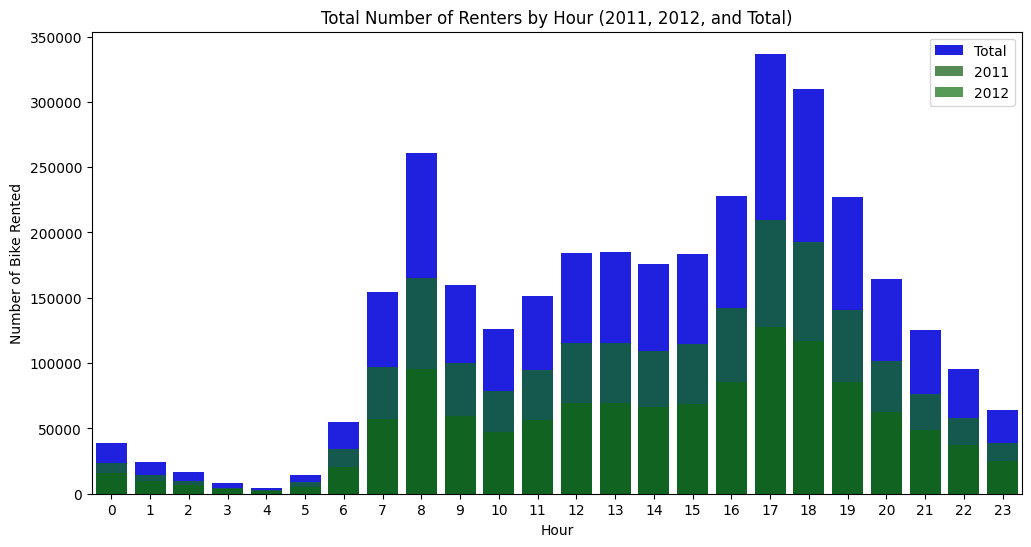

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggabungkan data tahun 2011 dan 2012
total_cnt_by_hour_combined = total_cnt_by_hour.merge(total_cnt_by_hour2011, on='hr', suffixes=('_total', '_2011'))
total_cnt_by_hour_combined = total_cnt_by_hour_combined.merge(total_cnt_by_hour2012, on='hr')

# Mengurutkan DataFrame berdasarkan jumlah penyewa secara descending
sorted_total_cnt_combined = total_cnt_by_hour_combined.sort_values(by='cnt_total', ascending=False)

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt_total', data=sorted_total_cnt_combined, color='blue', label='Total')
sns.barplot(x='hr', y='cnt_2011', data=sorted_total_cnt_combined, color='darkgreen', label='2011', alpha=0.7)  # Menggunakan alpha untuk memberi transparansi
sns.barplot(x='hr', y='cnt', data=sorted_total_cnt_combined, color='green', label='2012', alpha=0.7)  # Menggunakan alpha untuk memberi transparansi

# Konfigurasi plot
plt.xlabel('Hour')
plt.ylabel('Number of Bike Rented')
plt.title('Total Number of Renters by Hour (2011, 2012, and Total)')
plt.legend()
plt.show()


###Comparing "Bike Sharing" Usage in Different Weather Conditions

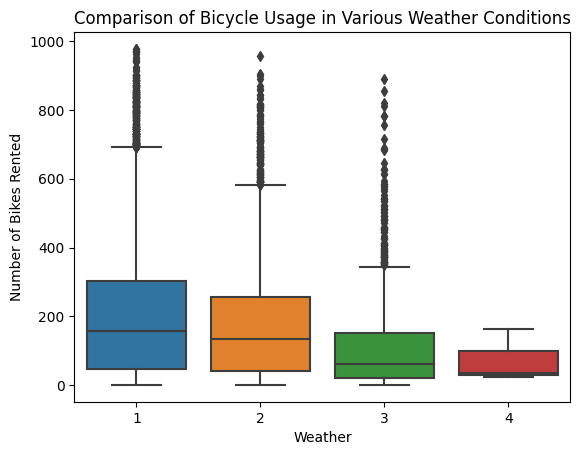

In [80]:

# Visualisasi untuk membandingkan penggunaan sepeda pada berbagai kondisi cuaca
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.xlabel('Weather')
plt.ylabel('Number of Bikes Rented')
plt.title('Comparison of Bicycle Usage in Various Weather Conditions')
plt.show()


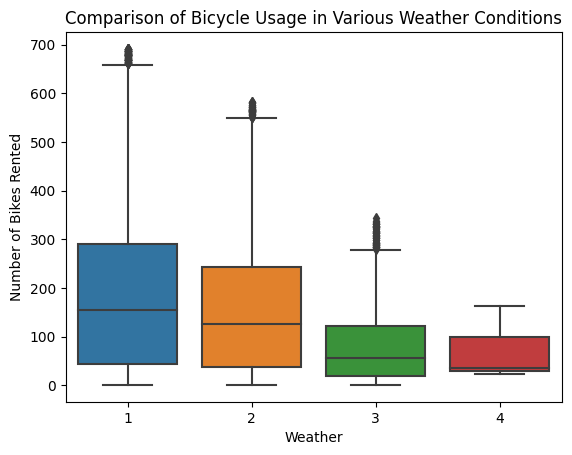

In [81]:
# Menghitung IQR untuk setiap kondisi cuaca
def remove_outliers_by_weather(data):
    cleaned_data = pd.DataFrame()
    for weather_condition in data['weathersit'].unique():
        subset = data[data['weathersit'] == weather_condition]
        Q1 = subset['cnt'].quantile(0.25)
        Q3 = subset['cnt'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = pd.concat([cleaned_data, subset[(subset['cnt'] >= lower_bound) & (subset['cnt'] <= upper_bound)]])
    return cleaned_data

# Menghapus outlier berdasarkan kondisi cuaca
bike_data_no_outliers = remove_outliers_by_weather(df_hour)

# Visualisasi tanpa outlier
sns.boxplot(x='weathersit', y='cnt', data=bike_data_no_outliers)
plt.xlabel('Weather')
plt.ylabel('Number of Bikes Rented')
plt.title('Comparison of Bicycle Usage in Various Weather Conditions')
plt.show()


Keterangan

1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan

2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut

3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan

4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

###Comparing the Use of "Bike Sharing" in Different Seasons

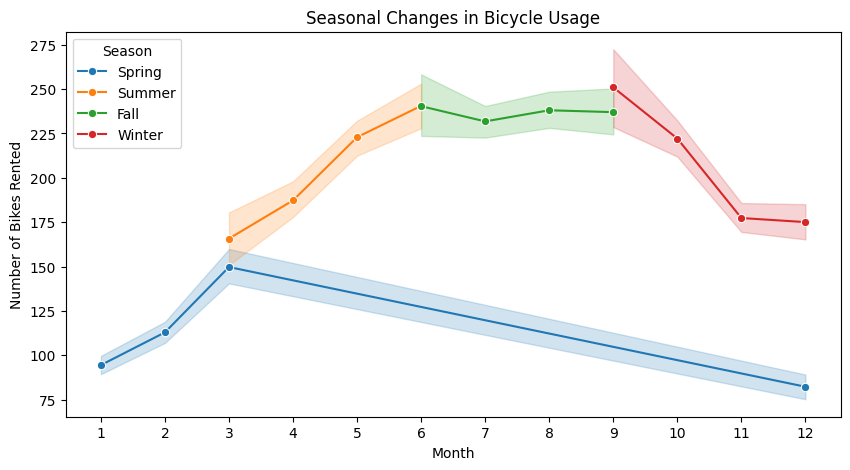

In [82]:
# Menyusun data untuk setiap musim
spring_data = df_hour[df_hour['season'] == 1]
summer_data = df_hour[df_hour['season'] == 2]
fall_data = df_hour[df_hour['season'] == 3]
winter_data = df_hour[df_hour['season'] == 4]

# Menggunakan line chart untuk melihat perubahan penggunaan sepeda sepanjang musim
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth', y='cnt', data=spring_data, label='Spring', marker='o')
sns.lineplot(x='mnth', y='cnt', data=summer_data, label='Summer', marker='o')
sns.lineplot(x='mnth', y='cnt', data=fall_data, label='Fall', marker='o')
sns.lineplot(x='mnth', y='cnt', data=winter_data, label='Winter', marker='o')

plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Number of Bikes Rented')
plt.title('Seasonal Changes in Bicycle Usage')
plt.legend(title='Season', loc='upper left')
plt.show()


## Conclusion

1. Jumlah penyewa sepeda cenderung meningkat pada jam-jam tertentu dalam sehari.
Puncak peminjaman terjadi pada jam 17, diikuti oleh jam 18 dan jam 8.
Pada tahun 2012, terjadi peningkatan signifikan dalam jumlah penyewa sepeda pada beberapa jam dibandingkan tahun 2011.

2. Berdasarkan analisis data, terlihat bahwa penggunaan sepeda cenderung lebih tinggi pada kondisi cuaca yang cerah dan sedikit awan selama dua tahun berturut-turut (2011-2012) dengan total yaitu cuaca cerah sebanyak 2338173 penyewa dan cuaca berawan sebanyak 795952 penyewa.

3. Dari visualisasi perubahan penggunaan sepeda sepanjang musim, terlihat pola peningkatan penggunaan sepeda selama musim semi sampai musim panas (dari Desember sampai Juni) dan penurunan selama musim dingin (dari bulan September sampai Desember). Jumlah penyewa pada musim gugur lebih banyak dibandingkan musim lainnya selama dua tahun berturut-turut (2011-2012) yaitu sebanyak 1061129 penyewa

##Advice

1. **Saran terkait Peminjaman Jam-Jam Tertentu:**
   - Mempertimbangkan peningkatan ketersediaan sepeda pada jam-jam puncak seperti jam 17, 18, dan 8 untuk memenuhi permintaan yang tinggi.
   - Melakukan promosi khusus atau diskon pada jam-jam tertentu untuk mendorong peminjaman sepeda selama periode tersebut.

2. **Saran terkait Kondisi Cuaca:**
   - Menyusun strategi pemasaran atau promosi khusus untuk meningkatkan peminjaman sepeda pada hari-hari dengan cuaca cerah.
   - Mengidentifikasi peluang untuk meningkatkan peminjaman sepeda saat cuaca berawan dengan menawarkan diskon atau program khusus.

3. **Saran terkait Musim dan Tren Tahunan:**
   - Menyesuaikan inventaris sepeda dan penawaran khusus sepanjang musim, dengan fokus pada peningkatan stok selama musim semi dan panas.
   - Memperhatikan permintaan yang tinggi selama musim gugur dan mempersiapkan penawaran khusus untuk menarik lebih banyak peminjam sepeda.

Saran-saran ini dapat membantu meningkatkan pengalaman pengguna, mengoptimalkan ketersediaan sepeda, dan merespons perubahan dalam pola peminjaman sepeda. Dengan memahami tren dan faktor-faktor pengaruh, layanan penyewaan sepeda dapat disesuaikan untuk memenuhi kebutuhan pelanggan dengan lebih efektif.

In [83]:
df_hour.to_csv("all_data.csv", index=False)